# Exploratory Data Analysis (EDA) on Framingham Heart Study Dataset 
Yiwen Fan

# Table of Contents

1. [Overview](#scrollTo=DSdE1xvgZc-K)
2. [Data Preparation](#scrollTo=otvjrWcW_baj)
3. [Exploratory Data Analysis (EDA)](#scrollTo=ZnU1JQAbFwhB)
4. [Feature Importance](#scrollTo=3PTBXusyKbMy&line=1&uniqifier=1)
5. [Reference](#scrollTo=YHMYGwNdKf-G)

# Report Summary

I handled data cleaning and missing values from the Framingham Heart Study dataset in this report. Then, I performed an EDA analysis of this data through From high-level data aggregations and visualizations. Finally, I did some preliminary explorations of the importance of the features.

# 1.Overview

## 1.1 Dataset 

The Framingham Heart Study (FHS) is an epidemiologic study begun in Framingham in 1948 with 5,209 men and women. This dataset contains patient information with 4240 records and 16 columns.

Reference:

https://docs.google.com/presentation/d/1MuDoUcFVJjPPZvbbV8GyEvtrVEzPZikV/edit#slide=id.p10

https://www.framinghamheartstudy.org/fhs-for-researchers/data-available-overview/

## 1.2 Variables 
Each row represents a patient, containing a patient's 15 risk factors and 1 target variable:

Demographic risk factors:

Column | Description |Null| Numeric or Categorical |  
-------------|-------------|-----|------------------------|
0. `male`| sex of patient <br> 1 - Male; 0 - Female | No | Categorical
1. `age`| age in years at first examination| No | Numeric
2. `education`| education status<br> Some high school (1), high school/GED (2), some college/vocational school (3), college (4) | <font color ='red'>Yes</font> | Categorical

Behavioral risk factors:

Column | Description | Null| Numeric or Categorical |  
-------------|-------------------|-----|------------------------|
3. `currentSmoker`| whether or not the patient is a current smoker <br> 1 - Yes; 0 - No | No | Categorical
4. `cigsPerDay`| the number of cigarettes the patient smoked on average in one day| <font color ='red'>Yes</font> | Numeric

Medical history risk factors:

Column | Description | Null| Numeric or Categorical |  
-------------|------------------------------------|----------|----------------------------|
5. `BPMeds`| whether or not the patient was on blood pressure medication at time of first examination <br> 1 - Yes; 0 - No | <font color ='red'>Yes</font> | Categorical
6. `prevalentStroke`| whether or not the patient had previously had a stroke <br> 1 - Yes; 0 - No | No | Categorical
7. `prevalentHyp`| whether or not the patient is currently hypertensive <br> 1 - Yes; 0 - No | No | Categorical
8. `diabetes`| whether or not the patient currently has diabetes <br> 1 - Yes; 0 - No | No | Categorical


Risk factors from first examination:

Column | Description | Null| Numeric or Categorical |  
-------------|-------------------|-----|------------------------|
9. `totChol`| Total cholesterol $(mg/dL)$| <font color ='red'>Yes</font> | Numeric
10. `sysBP`| Systolic blood pressure | No | Numeric
11. `diaBP`| Diastolic blood pressure | No | Numeric
12. `BMI`| Body Mass Index, weight $(kg)$ /height $(m)^2$ | <font color ='red'>Yes</font> | Numeric
13. `heartRate`| Heart rate $(beats/minute)$ | <font color ='red'>Yes</font> | Numeric
14. `glucose`| Blood glucose level $(mg/dL)$ | <font color ='red'>Yes</font> | Numeric

Target Variable:

Column | Description | Null| Numeric or Categorical |  
-------------|--------------------------|----------|------------------------|
15. `TenYearCHD`| 10-year risk of coronary heart disease  <br> 1 - Yes; 0 - No | No | Categorical 


# 2.Data Preparation

## 2.1 Importing Libraries

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np

# Import libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Import library for missingness
import missingno as msno

%matplotlib inline
sns.set(color_codes=True)

## 2.2 Loading Data

In [ ]:
raw  = pd.read_csv('https://raw.githubusercontent.com/soltaniehha/Intro-to-Data-Analytics/main/data/AnalyticsEdge-Datasets/Framingham.csv')

In [ ]:
print("The original data contains {A} rows and {B} columns.".format(A=raw.shape[0],B=raw.shape[1]))

The original data contains 4240 rows and 16 columns.


In [ ]:
print(raw.info())
raw.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB
None


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0


## 2.3 Imputing Missing Values

Based on the data types of variables that contains null values, I divide them into 3 groups.

1. Categoical type
- education 
- BPMeds


2. Numeric type
- cigsPerDay
- totChol
- BMI
- heartRate
- glucose

In [ ]:
raw.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

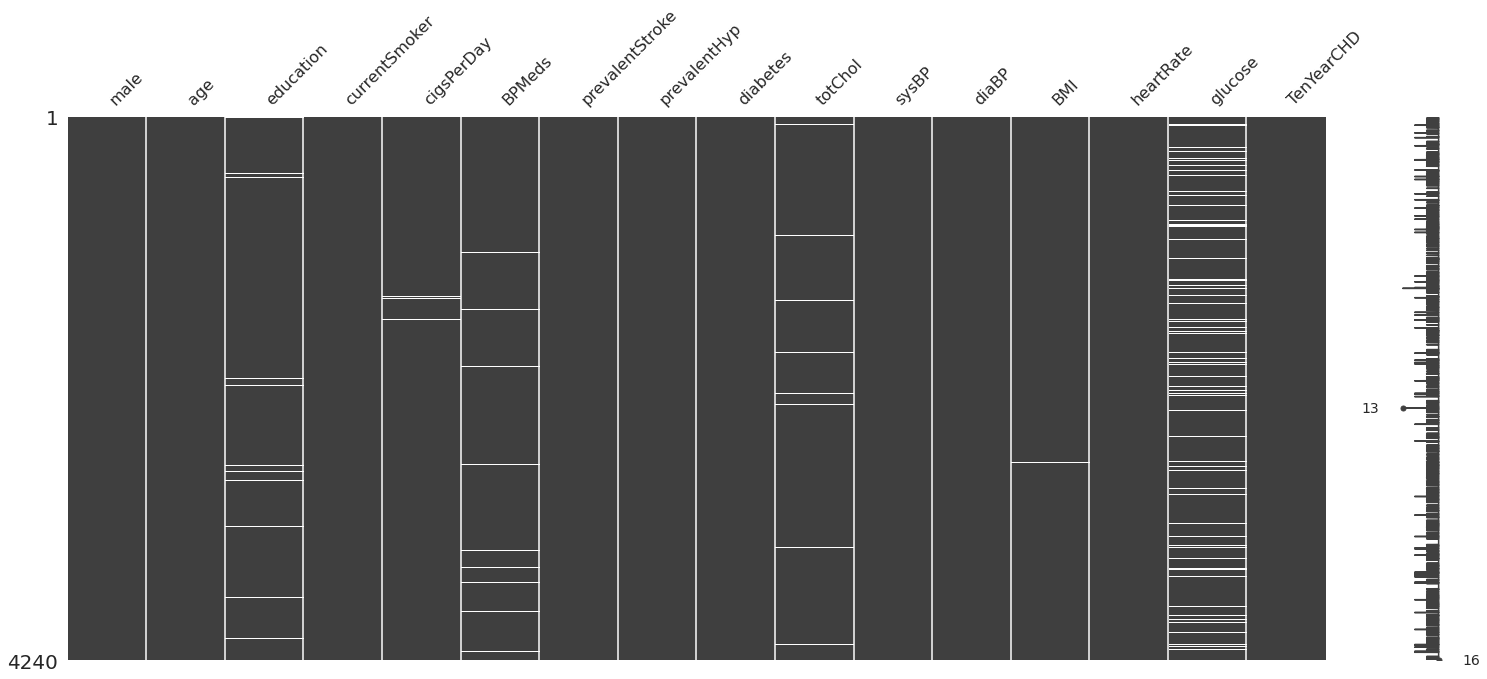

In [ ]:
# Visualize missingness of sorted data
raw_sorted=raw.sort_values("sysBP")
msno.matrix(raw_sorted)
plt.show()

### 2.3.1 Categorical Type: `education`

Due to the definition, `education` is a nominal variable, with values ranging from 1 to 4. Since `education` is a demographic attribute, the missing values may be related to age and sex. However, after looking into rows that have missing values in `education`, it is not likely the missing values are related to the patient's age or gender. It doesn't make sense to fill these nulls with specific values, and there are less than 2.5% missing values in `education`. Thus, I drop these null values in `education`.


In [ ]:
# Calculate the percentage of null values in "education"
percent_missing_edu = (raw['education'].isnull().sum() / raw.shape[0]) *100
percent_missing_edu

2.4764150943396226

In [ ]:
# Return the rows that have null values in "education"

education_is_NaN = raw["education"].isnull()
education_with_NaN = raw[education_is_NaN]

print(education_with_NaN[["male","age","education"]])

      male  age  education
33       1   61        NaN
36       1   56        NaN
72       0   37        NaN
184      1   67        NaN
213      0   34        NaN
...    ...  ...        ...
4082     1   47        NaN
4098     1   37        NaN
4121     0   55        NaN
4122     1   69        NaN
4138     1   67        NaN

[105 rows x 3 columns]


In [ ]:
# Drop rows where "education" is missing
df = raw.dropna(subset=['education'])

### 2.3.2 Categorical Type: `BPMeds`

Based on research via the Internet, Stage 2 high blood pressure is when systolic blood pressure is 140 or higher, or diastolic blood pressure is 90 or higher and will need medical treatment(https://www.cedars-sinai.org/health-library/diseases-and-conditions/h/high-blood-pressure-hypertension.html). 
Thus, for patients with `sysBP` >= 140 or `diaBP`>= 90, I replace the null values with "1.0".

In [ ]:
# Get the index of null values in BPMeds
BPMeds_null_index = raw[raw['BPMeds'].isnull()].index

# For patients with sysBP >= 140 or diaBP>= 90, replace the null values with 1.0 and others with 0.0
for i in BPMeds_null_index:
    if ( df['sysBP'][i] >= 140 or df['diaBP'][i] >= 90 ):
        df.loc[i,'BPMeds'] = 1.0  
    else:
        df.loc[i,'BPMeds'] = 0.0

### 2.3.3 Numeric Type: `cigsPerDay`

For smokers, null values in `cigsPerDay` should be replaced by the average of smokers' `cigsPerDay`. And for those who are not smokers, null values should be replaced by 0.

In [ ]:
# Return the index of rows that have null values in "cigsPerDay"
cigsPerDay_null_index = df[df['cigsPerDay'].isnull()].index

# Caculate the average of cigsPerDay for patients that are smokers (currentSmoker=1)
cigsperday_smoker= df[df['currentSmoker']==1].cigsPerDay.mean().round(2)
cigsperday_smoker

18.38

In [ ]:
# For patients who are smokers, replace the null values with cigsperday_smoker and others with 0
for i in cigsPerDay_null_index:
    if df['currentSmoker'][i] == 1:
        df.loc[i,'cigsPerDay'] = cigsperday_smoker
    else:
        df.loc[i,'cigsPerDay'] = 0.0

### 2.3.4 Numeric Type: `totChol`

Based on research via the Internet, more than 60% of people with high blood pressure also have high cholesterol (https://www.webmd.com/cholesterol-management/high-cholesterol-and-high-blood-pressure). I assume that with higher blood pressure, the total cholesterol level of a patient will also be higher. Thus, I use the forward fill to fill the null values in the data sorted by `sysBP`.

In [ ]:
# Sort the data by "sysBP" in ascending order
df =  df.sort_values("sysBP", ascending=False)

# Use ffill method to fill the nulls in "totChol"
df['totChol'] = df['totChol'].fillna(method='bfill')

### 2.3.5 Numeric Type: `BMI` and `heartRate`

There are only small percentage of missing values in `BMI` (0.45%) and `heartRate` (0.02%). Thus, I drop rows with nulls values in `BMI` and `heartRate`.

In [ ]:
# Calculate the percentage of null values in "BMI"
percent_missing_BMI = (raw['BMI'].isnull().sum() / raw.shape[0]) *100
percent_missing_BMI

0.4481132075471698

In [ ]:
# Calculate the percentage of null values in "heartRate"
percent_missing_heartRate = (raw['heartRate'].isnull().sum() / raw.shape[0]) *100
percent_missing_heartRate

0.02358490566037736

In [ ]:
# Drop rows where "BMI" is missing
df = df.dropna(subset=['BMI'])

# Drop rows where "heartRate" is missing
df = df.dropna(subset=['heartRate'])

### 2.3.6 Numeric Type: `glucose`

Diabetes is a disease that occurs when the blood glucose, also called blood sugar, is too high. (https://www.niddk.nih.gov/health-information/diabetes/overview/what-is-diabetes) 

For patients who have diabetes, I replace null values in `glucose` with the average of patients who have diabetes' `glucose`. And for those who don't have diabetes, I replace null values in `glucose` with the average of patients who don't have diabetes' `glucose`.

In [ ]:
# Return the index of rows that have null values in "glucose"
glucose_null_index = df[df['glucose'].isnull()].index

# Caculate the average of glucose for patients who have diabetes (diabetes=1)
glucose_diabetes= df[df['diabetes']==1].glucose.mean().round(2)
glucose_diabetes

169.18

In [ ]:
# Caculate the average of glucose for patients who don't have diabetes (diabetes=0)
glucose_no_diabetes= df[df['diabetes']==0].glucose.mean().round(2)
glucose_no_diabetes

79.48

In [ ]:
# For patients who have diabetes, replace the null values with "glucose_diabetes" and others with "glucose_no_diabetes"
for i in glucose_null_index:
    if df['diabetes'][i] == 1:
        df.loc[i,'glucose'] = glucose_diabetes
    else:
        df.loc[i,'glucose'] = glucose_no_diabetes

## 2.4 Converting Data Type

Convert categorical variables `eduacation` and `BPMeds` from float type to integer type.

In [ ]:
df.education = df.education.astype(int)
df.BPMeds = df.BPMeds.astype(int)

## 2.5 Checking Cleaned Data

### 2.5.1 Overview of Cleaned Data

In [ ]:
print("The cleaned data contains {A} rows and {B} columns.".format(A=df.shape[0],B=df.shape[1]))

The cleaned data contains 4116 rows and 16 columns.


In [ ]:
print(df.info())
df.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4116 entries, 481 to 3487
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4116 non-null   int64  
 1   age              4116 non-null   int64  
 2   education        4116 non-null   int64  
 3   currentSmoker    4116 non-null   int64  
 4   cigsPerDay       4116 non-null   float64
 5   BPMeds           4116 non-null   int64  
 6   prevalentStroke  4116 non-null   int64  
 7   prevalentHyp     4116 non-null   int64  
 8   diabetes         4116 non-null   int64  
 9   totChol          4116 non-null   float64
 10  sysBP            4116 non-null   float64
 11  diaBP            4116 non-null   float64
 12  BMI              4116 non-null   float64
 13  heartRate        4116 non-null   float64
 14  glucose          4116 non-null   float64
 15  TenYearCHD       4116 non-null   int64  
dtypes: float64(7), int64(9)
memory usage: 675.7 KB
None


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
481,0,64,1,0,0.0,0,0,1,0,253.0,295.0,135.0,38.82,92.0,70.0,1
3489,0,62,2,0,0.0,1,0,1,0,298.0,248.0,130.0,37.10,96.0,77.0,1
864,0,59,2,0,0.0,1,0,1,0,264.0,244.0,124.0,19.61,76.0,120.0,1


### 2.5.2 Descriptive Statistics & Correlation Heatmap of Numeric Variables

In [ ]:
# Map all variables into 2 buckets: categorical and numeric 
num_attr=["age","cigsPerDay","totChol","sysBP", "diaBP","BMI","heartRate","glucose"]
cat_attr=["male","education","currentSmoker","BPMeds","prevalentStroke","prevalentHyp","diabetes"]

In [ ]:
# Print descriptive statistics of numeric variables
df[num_attr].describe()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000
mean,49.536929,9.109879,236.634354,132.333819,82.886905,25.776492,75.920554,81.743465
std,8.546910,11.921155,44.136386,22.003009,11.946418,4.083106,12.051661,22.787542
min,32.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,42.000000,0.000000,206.000000,117.000000,75.000000,23.060000,68.000000,72.000000
50%,49.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,79.480000
75%,56.000000,20.000000,263.000000,143.500000,89.500000,27.990000,83.000000,85.000000
max,70.000000,70.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000


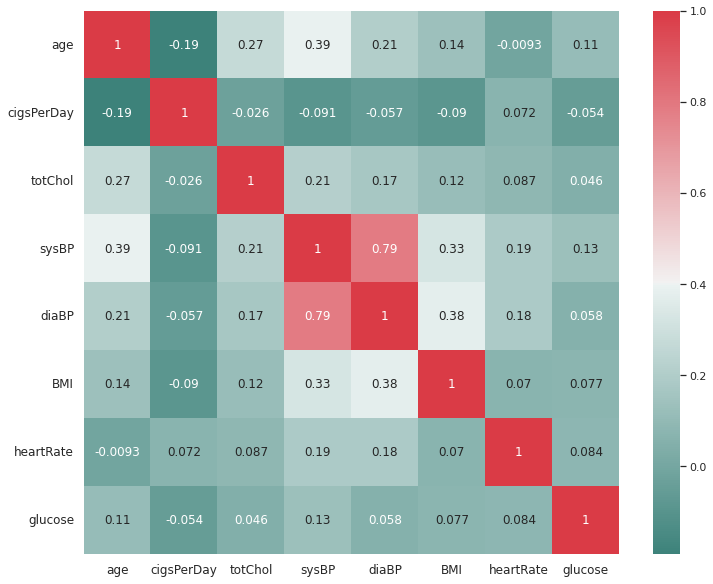

In [ ]:
# Correlation between variables
corr = df[num_attr].corr()
# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(12, 10))
# Configure a custom diverging colormap
cmap = sns.diverging_palette(180, 10, as_cmap=True)
# Draw the heatmap
ax = sns.heatmap(corr, annot=True, cmap=cmap)
# Format the tick labels
ax.set_xticklabels(num_attr, fontsize = 12)
ax.set_yticklabels(num_attr, rotation=0, fontsize = 12);

# 3.Exploratory Data Analysis (EDA) 

## 3.1 Checking Imbalance of Target Variable: `TenYearCHD`

Using this dataset, we are trying to predict if the patient has the 10-yrs risk of coronary heart disease. 
Therefore we have a binary classification problem with an unbalanced target:

In [ ]:
TenYearCHD_1_ratio = df[df['TenYearCHD'] == 1].shape[0] / df.shape[0] *100
print("TenYearCHD: 1 - " + str(round(TenYearCHD_1_ratio, 2)) + "%")

TenYearCHD_0_ratio = df[df['TenYearCHD'] == 0].shape[0] / df.shape[0] *100
print("TenYearCHD: 0 - " + str(round(TenYearCHD_0_ratio, 2)) + "%")

TenYearCHD: 1 - 14.99%
TenYearCHD: 0 - 85.01%


## 3.2 Checking Distribution of Numeric Variables

For numeric variables, I use histogram and Kernel density estimation (KDE) to check the distribution of observations. 

The histogram represents the distribution of each numeric variable by counting the number of observations that fall within discrete bins. Similarly, KDE means the data using a continuous probability density curve.

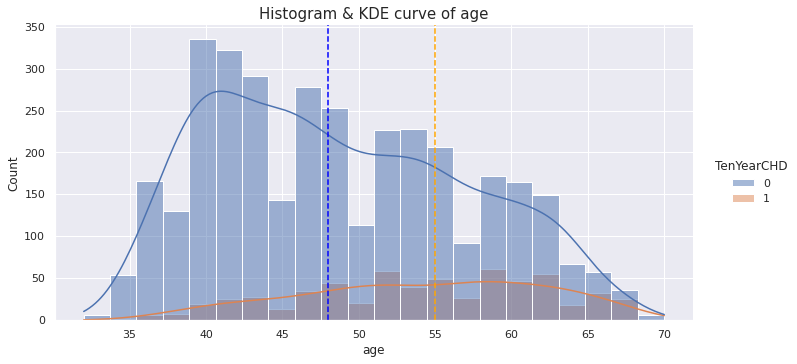

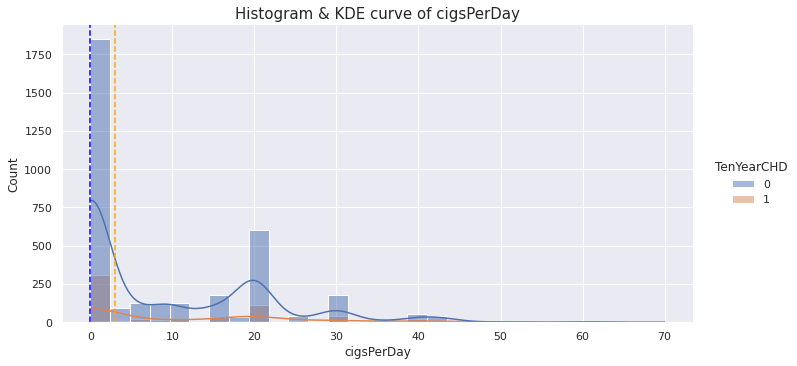

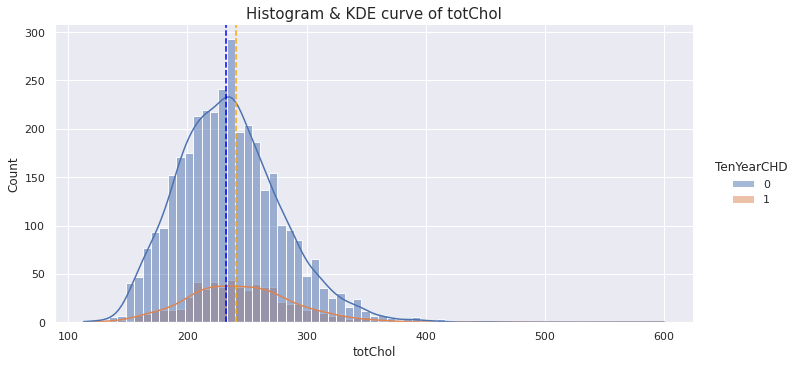

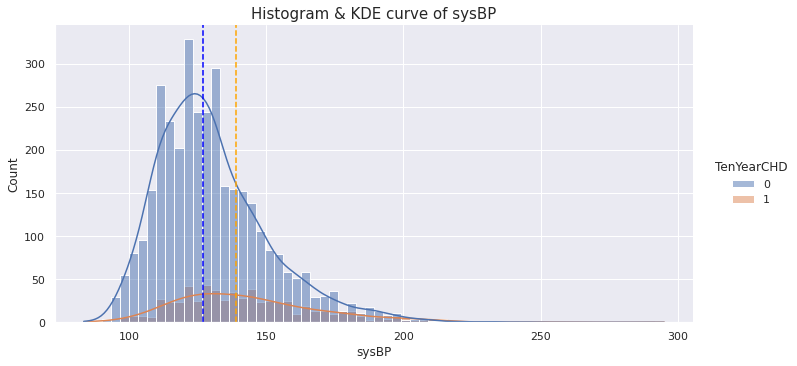

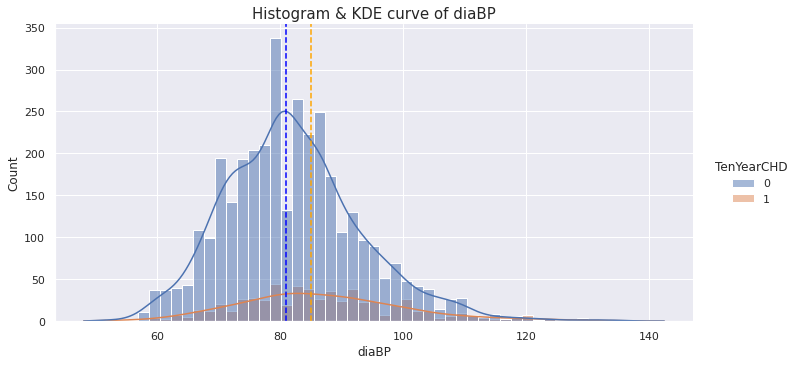

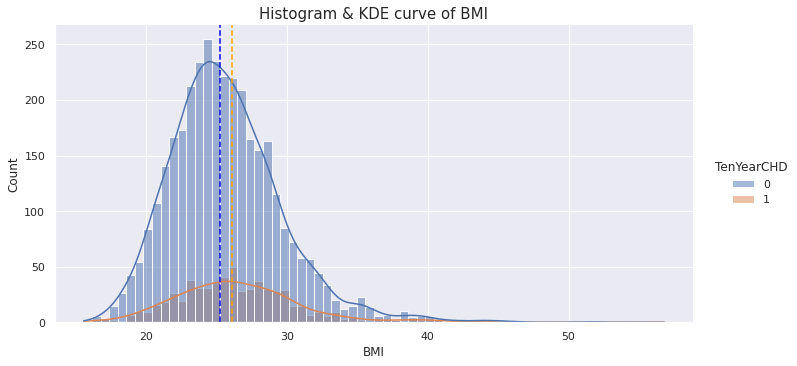

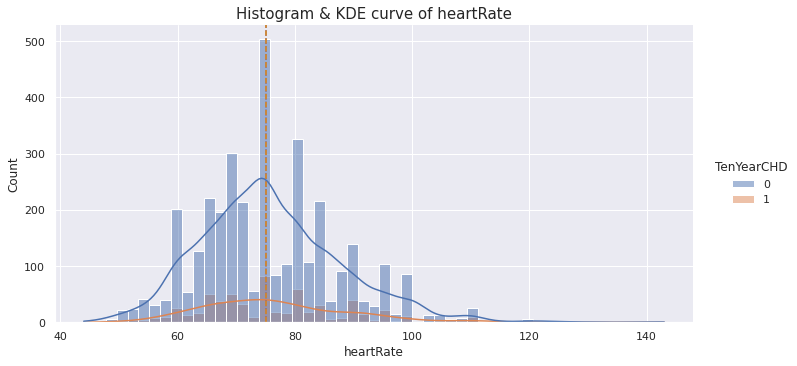

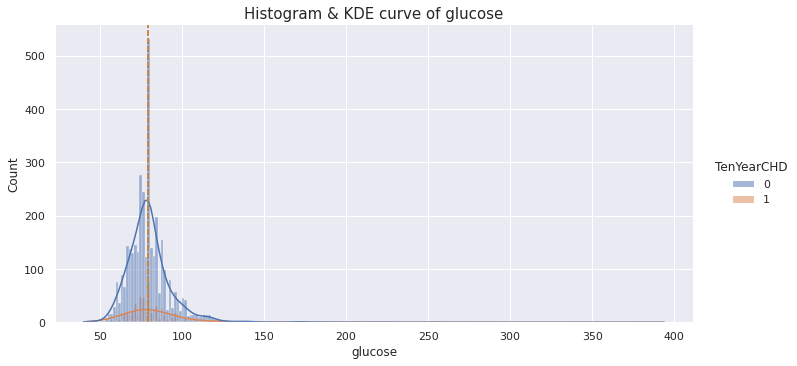

In [ ]:
def displot(feature):
    for i in feature: 
        g = sns.displot(data=df, x=i, hue='TenYearCHD', kde=True, height=5, aspect=2)
        # Plot vertical lines showing the median of each group
        plt.axvline(df[df['TenYearCHD']==0][i].median(), linestyle='--',color="blue")
        plt.axvline(df[df['TenYearCHD']==1][i].median(), linestyle='--',color="orange")
        plt.title("Histogram & KDE curve of "+str(i), fontsize=15)

displot(num_attr)

From the plots above, it can be concluded that:
- Elder patients are more likely to have a 10-year risk of coronary heart disease
- `totChol`, `sysBP`, `diaBP`, `BMI`, and `glucose` all have right-skewed distributions
- `totChol`, `sysBP`, and `diaBP` are probably important features

## 3.3 Checking Categorical Variables

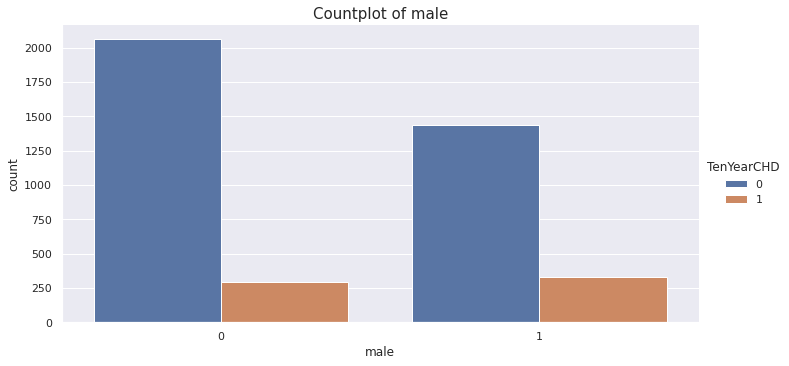

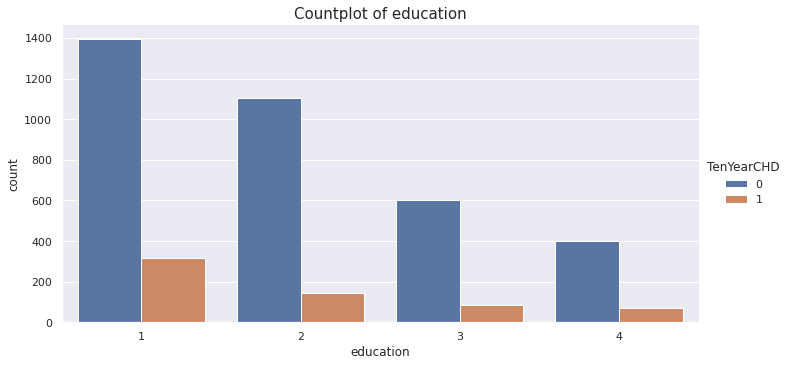

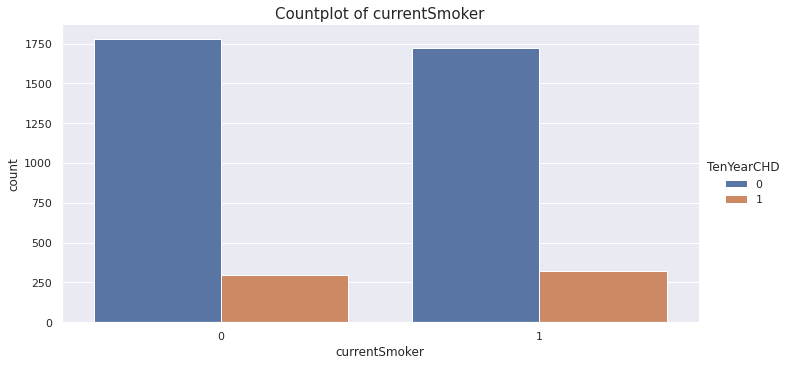

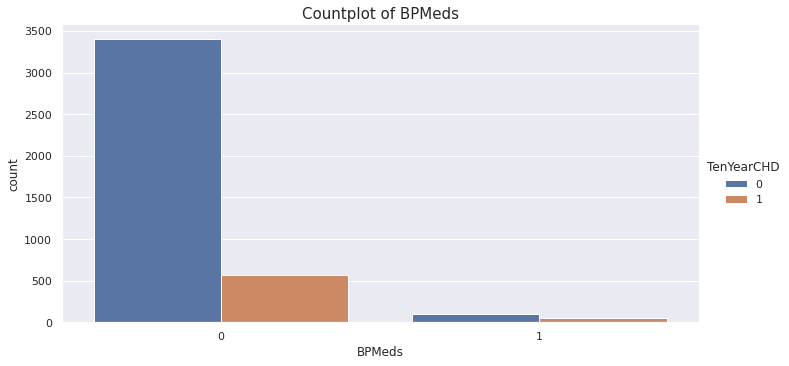

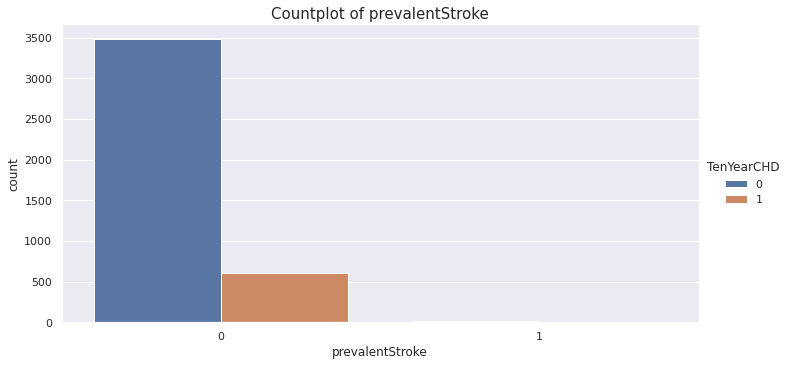

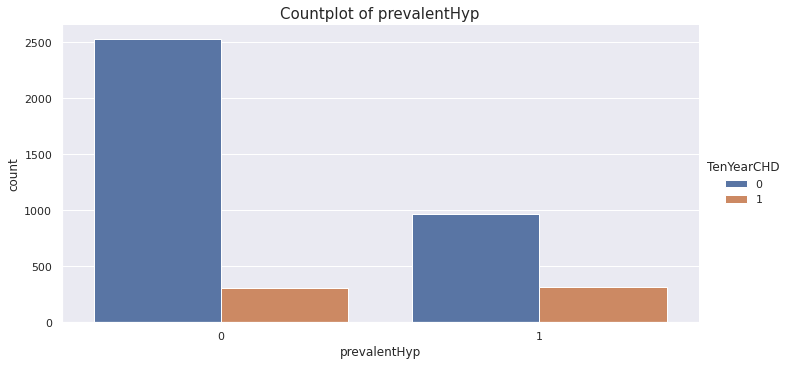

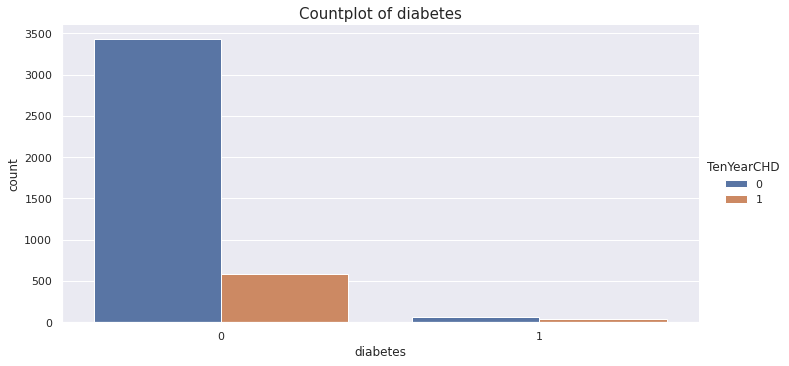

In [ ]:
def countplot(feature):
    for i in feature: 
        g = sns.catplot(data=df, x=i, hue='TenYearCHD', kind="count", height=5, aspect=2)
        plt.title("Countplot of "+str(i), fontsize=15)

countplot(cat_attr)

From the plots above, it can be concluded that:
- Imbalance exists in `BPMeds`, `prevalentStroke`, and `diabetes`

Plot the relationship between categorical variables and risk for `TenYearCHD`:

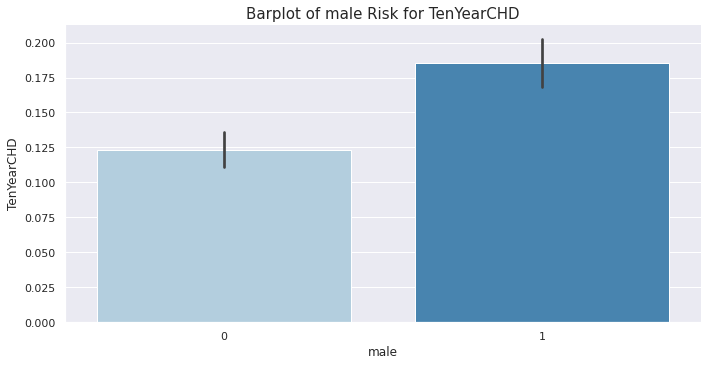

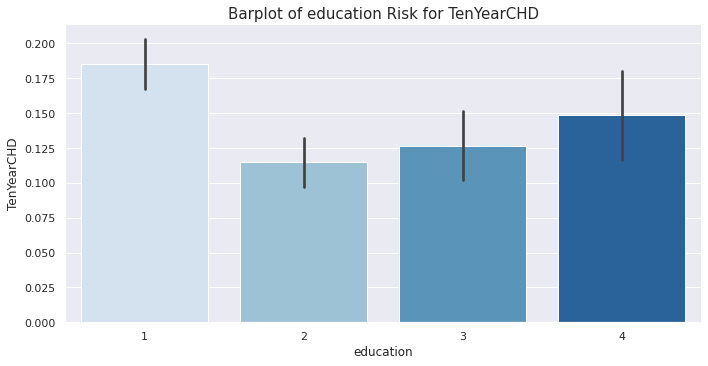

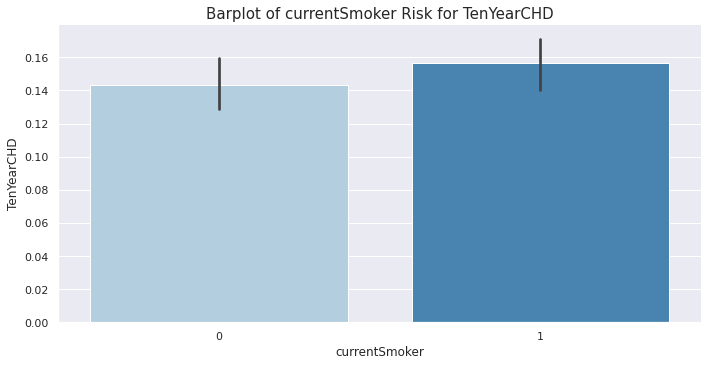

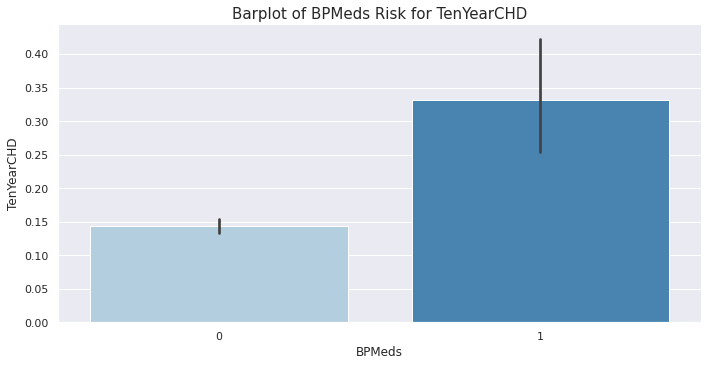

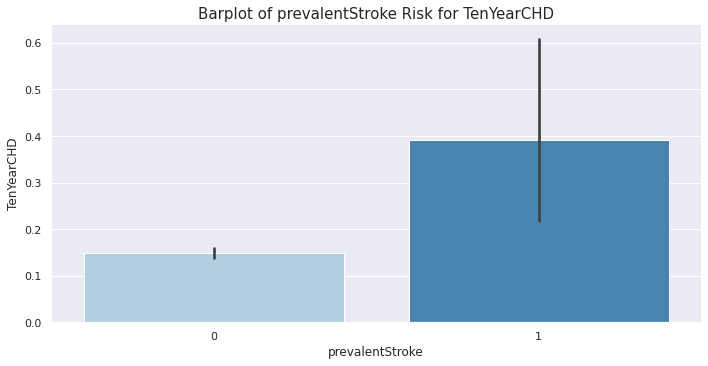

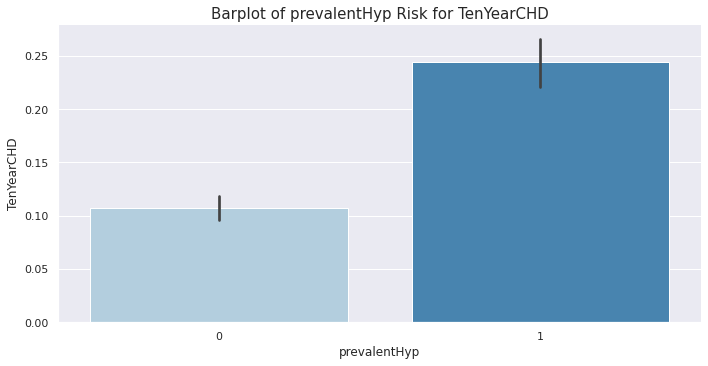

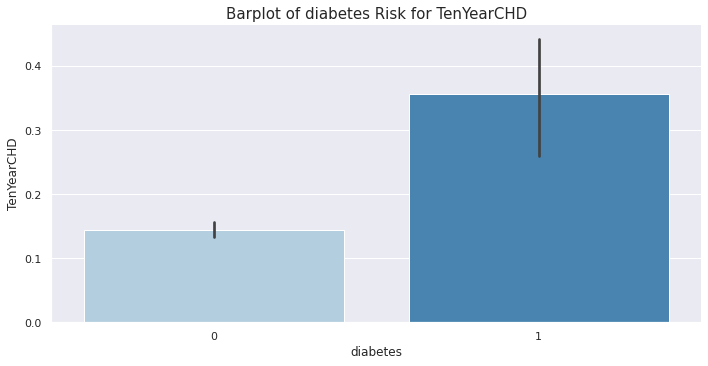

In [ ]:
def barplot(feature):
    for i in feature: 
        g = sns.catplot(data=df, x=i, y='TenYearCHD', kind="bar", height=5, aspect=2, palette = "Blues")
        plt.title("Barplot of "+str(i)+" Risk for TenYearCHD", fontsize=15)

barplot(cat_attr)

From the plots above, it can be concluded that:
- Without considering the distortion of the data, `male` (gender), `BPMeds`, `prevalentStroke`, `prevalentHyp` and `diabetes` may impact the 10-year risk of coronary heart disease.

## 3.3 Data Aggregation & Insights

### 3.3.1 Relationship Between `age`, Medical History Risk Factors & Target Variable `TenYearCHD`

In [ ]:
df.pivot_table(values='age', index='BPMeds', columns='TenYearCHD', aggfunc='mean')

TenYearCHD,0,1
BPMeds,,
0,48.553760,53.807018
1,55.063158,57.787234


In [ ]:
df.pivot_table(values='age', index='prevalentHyp', columns='TenYearCHD', aggfunc='mean')

TenYearCHD,0,1
prevalentHyp,,
0,47.282385,51.878689
1,52.522234,56.291667


In [ ]:
df.pivot_table(values='age', index='prevalentStroke', columns='TenYearCHD', aggfunc='mean')

TenYearCHD,0,1
prevalentStroke,,
0,48.717073,54.026316
1,52.071429,59.777778


In [ ]:
df.pivot_table(values='age', index='diabetes', columns='TenYearCHD', aggfunc='mean')

TenYearCHD,0,1
diabetes,,
0,48.623543,53.984483
1,54.208955,56.081081


From these pivot tables, we can see that:
- For patients with a medical history of risk factors and a 10-year risk of coronary heart disease, their average age is more significant than those without.

We can assume that:
- For patients with medical history risk factors, for example, patients who were taking blood pressure medication at the time of the first examination, are more likely to have the risk of having the 10-year risk of coronary heart disease when they age.

### 3.3.2 Relationship Between `glucose`, `diabetes` & Target Variable `TenYearCHD`

In [ ]:
df.pivot_table(values='glucose', index='diabetes', columns='TenYearCHD', aggfunc='mean')

TenYearCHD,0,1
diabetes,,
0,79.278252,80.652759
1,149.065075,205.599459


From the pivot table, we can see that:
- For patients who don't have diabetes, their average glucose level is almost the same, regardless of having a 10-year risk of coronary heart disease.
- However, for patients who have diabetes, there is a considerable increment in glucose levels. 
- And for the patient with sand diabetes and a 10-year risk of coronary heart disease, their average glucose level is almost 2.5 times higher than the standard case. 

### 3.3.3 Relationship Between Blood Pressure Level & Target Variable `TenYearCHD`

In terms of the 10-year risk of coronary heart disease alone, there is no significant difference in blood pressure between patients at the 10-year risk of coronary heart disease and those who are not.

In [ ]:
df_sysBP = df.groupby(['TenYearCHD']).agg({'sysBP': 'mean'}).reset_index()
df_diaBP = df.groupby(['TenYearCHD']).agg({'diaBP': 'mean'}).reset_index()
agg_df_BP= df_sysBP.merge(df_diaBP, on="TenYearCHD")
agg_df_BP

,TenYearCHD,sysBP,diaBP
0,0,130.343098,82.155616
1,1,143.623177,87.034036


Therefore, I add another parameter, the medical history risk factor, to see whether the presence of underlying medical history would interact with a 10-year risk of coronary heart disease and thus affect the patient's blood pressure values.

In [ ]:
df.pivot_table(values=['sysBP','diaBP'], index=['TenYearCHD','BPMeds'],  aggfunc='mean')

diaBP       sysBP
TenYearCHD BPMeds                       
0          0       81.778496  129.493831
           1       95.668421  160.773684
1          0       86.278070  141.381579
           1       96.202128  170.808511

In [ ]:
df.pivot_table(values=['sysBP','diaBP'], index=['TenYearCHD','prevalentHyp'],  aggfunc='mean')

diaBP       sysBP
TenYearCHD prevalentHyp                       
0          0             77.802528  121.620458
           1             93.553775  153.182523
1          0             79.022951  125.468852
           1             94.865385  161.370192

In [ ]:
df.pivot_table(values=['sysBP','diaBP'], index=['TenYearCHD','prevalentStroke'],  aggfunc='mean')

diaBP       sysBP
TenYearCHD prevalentStroke                       
0          0                82.128407  130.286083
           1                88.928571  144.535714
1          0                86.981908  143.467928
           1                90.555556  154.111111

In [ ]:
df.pivot_table(values=['sysBP','diaBP'], index=['TenYearCHD','diabetes'],  aggfunc='mean')

diaBP       sysBP
TenYearCHD diabetes                       
0          0         82.089307  130.089015
           1         85.552239  143.358209
1          0         86.986207  143.164655
           1         87.783784  150.810811

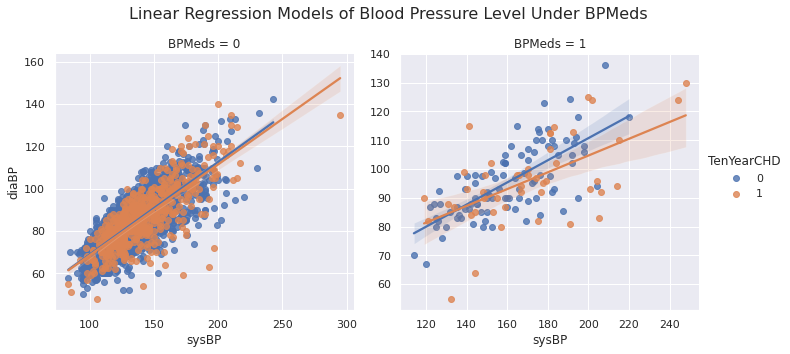

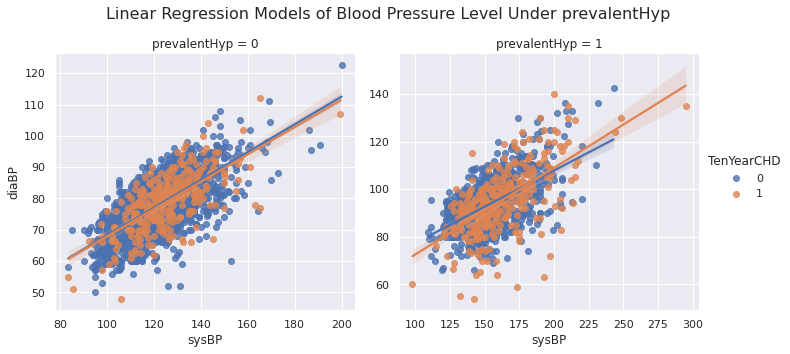

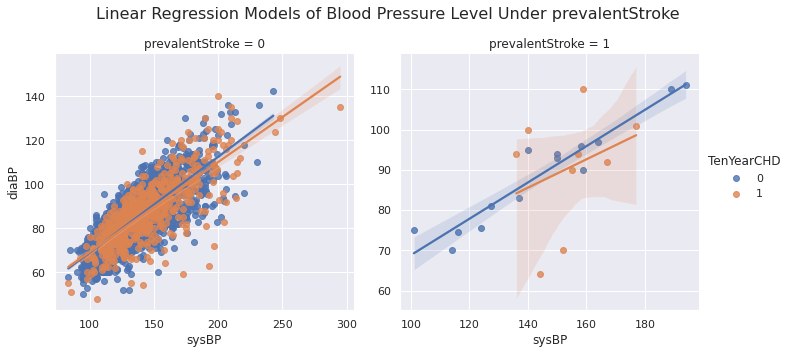

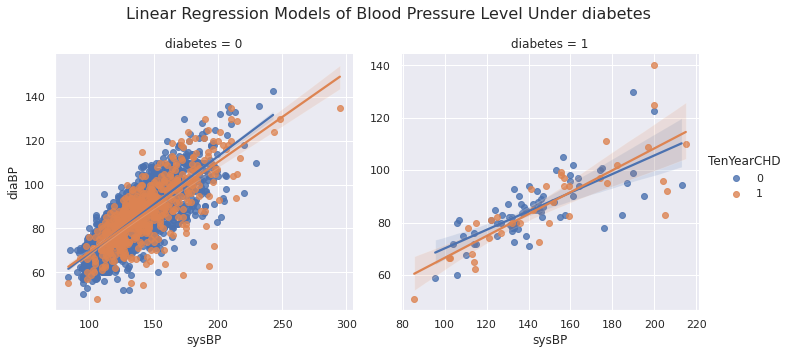

In [ ]:
def lmplot(feature):
    for i in feature: 
        g = sns.lmplot(data=df, x="sysBP", y="diaBP",hue="TenYearCHD", col=i, height=5, facet_kws=dict(sharex=False, sharey=False))
        plt.subplots_adjust(top=0.85)
        plt.suptitle("Linear Regression Models of Blood Pressure Level Under "+str(i), fontsize = 16)

lmplot(["BPMeds","prevalentHyp","prevalentStroke","diabetes"]);

It can be inferred from the graphs that:
- Only for hypertensive patients or those with diabetes the presence of underlying medical history would interact with a 10-year risk of coronary heart disease and thus push the patient's blood pressure values to a higher level. 

# 4.Feature Importance

I use the Random Forest classifier in this section to get some preliminary feature importances.


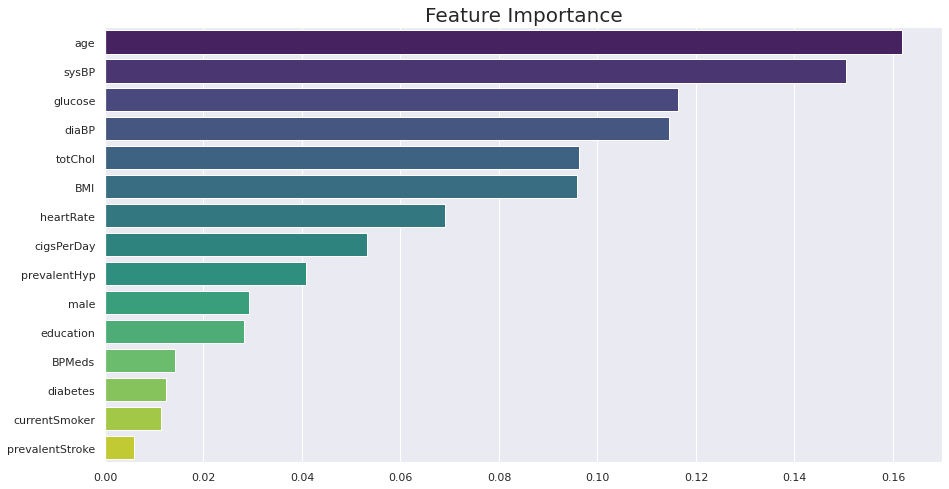

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create X and y dataframe
df_X = df.drop('TenYearCHD',axis=1)
df_y = df['TenYearCHD']


# Fit RandomForest Classifier
params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 5000, 'max_depth': 8}
clf = RandomForestClassifier(**params)
clf = clf.fit(df_X, df_y)

# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=df_X.columns).sort_values(ascending=False)
plt.figure(figsize=(15,8))
plt.title("Feature Importance", fontsize=20)
ax = sns.barplot(y=imp.index, x=imp.values, palette="viridis", orient='h')

From the graph, `age`, `sysBP`, `glucose`, `diaBP` and `totChol` are the Top 5 features with greatest importance.

# 5.Reference

- Seanborn: displot (https://seaborn.pydata.org/generated/seaborn.displot.html)
- Seaborn: Statistical Data Visualization (https://seaborn.pydata.org)
- BA780 Intro-to-Data-Analytics (https://github.com/soltaniehha/Intro-to-Data-Analytics.git)